Imports

In [1]:
from matplotlib import pyplot as plt 
import numpy as np
import cv2
import glob 

Question 1

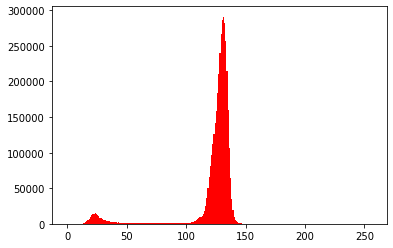

Images\1\3.JPG


In [2]:
#Find all the names of all the files with the format .jpg in the file Images\1 
#The folder with jpg imgs must be in 'Images\1' at root directory!
imgNames = glob.glob(r'Images\1\*.jpg') 
#imgNames is a list with the file names with the format .jpg in file Images\1 
bestFocus = ''
var = 0
besthist = None
for image in imgNames:
    img = cv2.imread(image,0)
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    hist /= img.size
    if np.var(hist) > var:
        var = np.var(hist)
        bestFocus = image
        bsethist = hist
plt.hist(cv2.imread(bestFocus,0).flatten(),256,[0,256], color = 'r') 
plt.show()  #calculating histogram
print(bestFocus)
# cv2.imshow('Original image',cv2.imread(bestFocus,0))
# cv2.waitKey(0)
# cv2.destroyAllWindows()

The sharpest picture is '3.img'  
With variance of normalized histogram: 0.00016958172
Because the camera wasn't static the variance mostly depends on it,
in my case im 3 have less focus subjectively than img 13 which has lower variance

Question 2


Picture:  Images\2\lena_color_256.tif
Max number of same color:  671
Min number of same color:  0
Chance to get color  255  is:  0.0
Chance to get color  200  is:  0.0033
Chance to get color  128  is:  0.0078
Chance to get color  67  is:  0.004
Chance to get color  16  is:  0.0
Chance to get color  0  is:  0.0
Chance to get Color between 25-99: 
Entropy: 5.0984

Picture:  Images\2\mandril_color.tif
Max number of same color:  3563
Min number of same color:  0
Chance to get color  255  is:  0.0
Chance to get color  200  is:  0.0002
Chance to get color  128  is:  0.0053
Chance to get color  67  is:  0.0062
Chance to get color  16  is:  0.0
Chance to get color  0  is:  0.0
Chance to get Color between 25-99: 
Entropy: 5.0359

Picture:  Images\2\peppers_color.tif
Max number of same color:  8094
Min number of same color:  0
Chance to get color  255  is:  0.0
Chance to get color  200  is:  0.0
Chance to get color  128  is:  0.0
Chance to get color  67  is:  0.0026
Chance to get color  16  is:

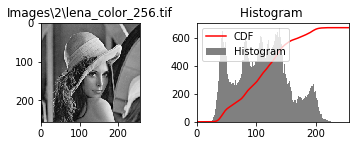

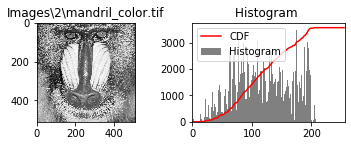

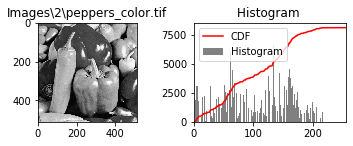

In [3]:
#The folder with tif tif must be in 'Images\2' at root directory!
imgNames = glob.glob(r'Images\2\*.tif') 

def getImageHistorgam(img):
    return np.histogram(img.flatten(),256,[0,256])

def imageDynamicRange(hist):
    return np.max(hist), np.min(hist)

def hostogramToProbability(hist):
    return hist/img.size

def toneProbability(hist_notmalized,color):
    return np.round(hist_notmalized[color],4)

def cdfPlot(image,hist_notmalized):
    hist = hist_notmalized*cv2.imread(image, 0).size
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    
    fig = plt.figure()
    fig.add_subplot(221)
    plt.title(image)
    plt.set_cmap('gray')
    plt.imshow(img)
    
    fig.add_subplot(222)
    plt.title('Histogram ')
    plt.plot(cdf_normalized, color = 'r')
    plt.hist(img.flatten(),256,[0,256], color = 'grey')
    plt.xlim([0,256])
    plt.legend(('CDF','Histogram'), loc = 'upper left')
    #plt.text(60, np.max(hist)/20, image, fontsize=6)
    plt.show()

def computeEntropy(hist):
    hist_notmalized = hist/np.sum(hist)
    return np.round(-(hist_notmalized*np.ma.log(np.abs(hist_notmalized))).sum(),4)
    
    
for image in imgNames:
    print('\nPicture: ', image)
    img = cv2.imread(image, 0)
    hist, bin = getImageHistorgam(img)
    hist_notmalized = hostogramToProbability(hist)
    
    maxr, minr = imageDynamicRange(hist)
    print('Max number of same color: ', maxr)
    print('Min number of same color: ', minr)
    for item in [255,200,128,67,16,0]:
        print('Chance to get color ', item, ' is: ',toneProbability(hist_notmalized,item))
    cdfPlot(image,hist_notmalized)
    print('Chance to get Color between 25-99: ', )
    print('Entropy:',computeEntropy(hist))
    
# cv2.imshow('Original image',cv2.imread(bestFocus,0))
# cv2.waitKey(0)
# cv2.destroyAllWindows()

max_t_list = []

Question 3

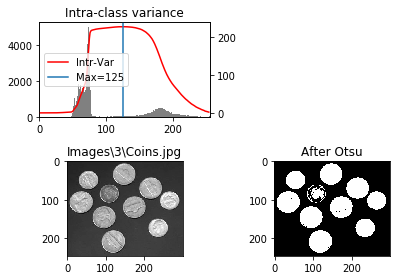

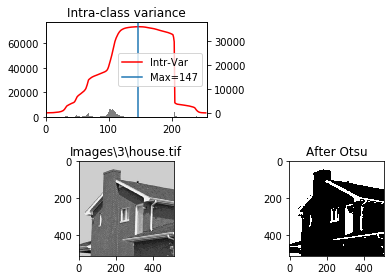

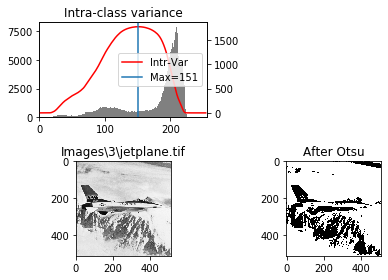

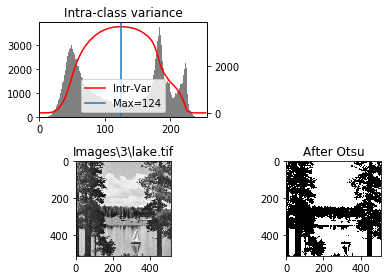

In [4]:
#The folder with tif tif/jpg must be in 'Images\3' at root directory!
imgNamesJpg = glob.glob(r'Images\3\*.jpg') 
imgNamesTif = glob.glob(r'Images\3\*.tif') 
imgNames = imgNamesJpg + imgNamesTif

def Otsu_Thershold(image):
    img = cv2.imread(image, 0)
    hist, bin = getImageHistorgam(img)
    hist_norm = hostogramToProbability(hist)
    itrClassVar = []
    for i in range(1,hist.size,1):
        w0 = np.sum(hist_norm[0:i])
        w1 = np.sum(hist_norm[i:])
        avg1, avg2, avgt = 0, 0, 0
        for k in range(0,i,1):
            avg1 += k*hist_norm[k]
        for j in range(i,256,1):
            avg2 += j*hist_norm[j]
        if w0 != 0 and w1 != 0:
            itrClassVar.append(w0*w1*(avg1/w0-avg2/w1)**2)
            #print(w0*w1)
        else:
            itrClassVar.append(0)
    #print(cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[0]) # Real otsu for test
    return np.argmax(itrClassVar), np.array(itrClassVar)

def plotConveragenceCriteria(itrClassVar):
    plt.plot(tgraph, color = 'r', label = 'Intr-Var')
    
def imageSegmentation_Otsu(img, t):
    img = cv2.imread(image, 0)
    fig = plt.figure()
    fig.tight_layout()
    fig.add_subplot(121)
    plt.title(image)
    plt.set_cmap('gray')
    plt.imshow(img)
    
    fig.add_subplot(122)
    plt.tight_layout()
    plt.title('After Otsu')
    plt.set_cmap('gray')
    plt.imshow(cv2.threshold(img, t, 255, cv2.THRESH_BINARY)[1])
    plt.show()
    
    
for image in imgNames:
    t,tgraph = Otsu_Thershold(image)
    img = cv2.imread(image, 0)
    
    fig = plt.figure()
    fig.tight_layout()
    fig.add_subplot(223)
    plt.title(image)
    plt.set_cmap('gray')
    plt.imshow(img)
    plt.tight_layout()
    
    ax2 = fig.add_subplot(221)
    plt.title('Intra-class variance')
    plt.hist(img.flatten(),256,[0,256], color = 'grey')
    ax2intr = ax2.twinx()
    ax2intr.plot(tgraph, color = 'r', label = 'Intr-Var')
    tmaxstr = 'Max='+ str(t)
    plt.axvline(x=t,label=tmaxstr)
    plt.legend(loc=0)
    plt.xlim([0,256])
    plt.tight_layout()
    #plt.text(60, np.max(hist)/20, image, fontsize=6)
    
    fig.add_subplot(224)
    plt.title('After Otsu')
    plt.set_cmap('gray')
    plt.imshow(cv2.threshold(img, t, 255, cv2.THRESH_BINARY)[1])
    plt.tight_layout()
    plt.show()

To optimize the algorithm it's better to check for two peaks in smoothed histogram
that way we eliminate at least non bimodal histograms.

To improve we can use two-dimensional Otsu (2 histograms), which give us better results on noisy pictures.
Generally we create pairs of class and his neighborhood average for each class of the histogram,
then we continue the same way but in two-dimensional equations.

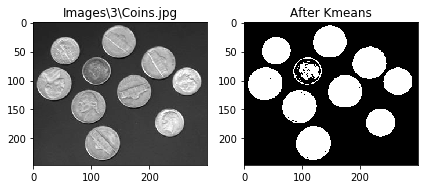

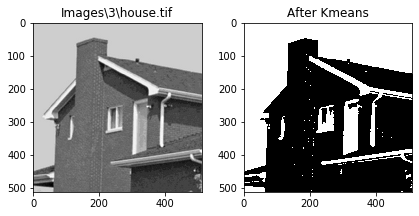

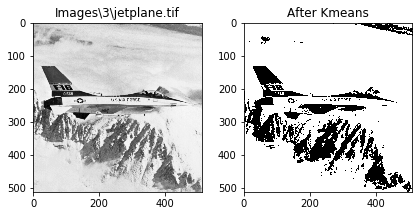

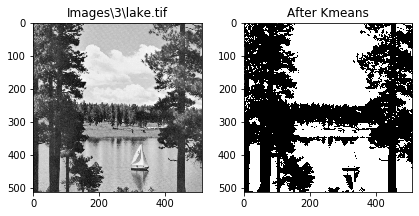

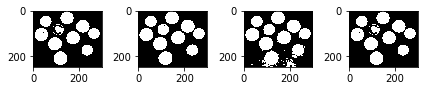

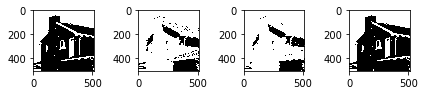

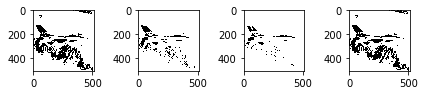

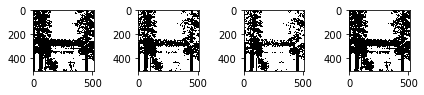

In [10]:
def Kmeans(hist,k1,k2):
    t = int((k1+k2)/2)
    for i in range(20):
        k1 = int((t-1)/2)
        k2 = int((t+256)/2)
        t == int((k1+k2)/2)
    return t

#The folder with tif tif/jpg must be in 'Images\3' at root directory!
imgNamesJpg = glob.glob(r'Images\3\*.jpg') 
imgNamesTif = glob.glob(r'Images\3\*.tif') 
imgNames = imgNamesJpg + imgNamesTif

for image in imgNames:
    img = cv2.imread(image, 0)
    hist, bin = getImageHistorgam(img)
    t = Kmeans(hist,0,255)
    
    fig = plt.figure()
    fig.tight_layout()
    fig.add_subplot(121)
    plt.title(image)
    plt.set_cmap('gray')
    plt.imshow(img)
    plt.tight_layout()
    
    
    fig.add_subplot(122)
    plt.title('After Kmeans')
    plt.set_cmap('gray')
    plt.imshow(cv2.threshold(img, t, 255, cv2.THRESH_BINARY)[1])
    plt.tight_layout()
    plt.show()
    
for image in imgNames:
    img = cv2.imread(image, 0)
    hist, bin = getImageHistorgam(img)
    fig2 = plt.figure()
    
    t = Kmeans(hist,0, 255)
    fig2.add_subplot(141)
    plt.set_cmap('gray')
    plt.imshow(cv2.threshold(img, t, 255, cv2.THRESH_BINARY)[1])
    plt.tight_layout() 
    t = Kmeans(hist,30, 150)
    fig2.add_subplot(142)
    plt.set_cmap('gray')
    plt.imshow(cv2.threshold(img, t, 255, cv2.THRESH_BINARY)[1])
    plt.tight_layout()   
    t = Kmeans(hist,50, 100)
    fig2.add_subplot(143)
    plt.set_cmap('gray')
    plt.imshow(cv2.threshold(img, t, 255, cv2.THRESH_BINARY)[1])
    plt.tight_layout()
    t = Kmeans(hist,125, 126)
    fig2.add_subplot(144)
    plt.set_cmap('gray')
    plt.imshow(cv2.threshold(img, t, 255, cv2.THRESH_BINARY)[1])
    plt.tight_layout()
    plt.show()
    

The results are different, different classes where transformed to binary version.
Initial arguments shout sit on the peaks of bimodal histogram.
Both aproaches are greater than n time but otse have better result for bimodal histogram!

Question 4

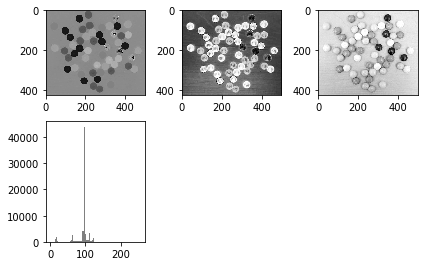

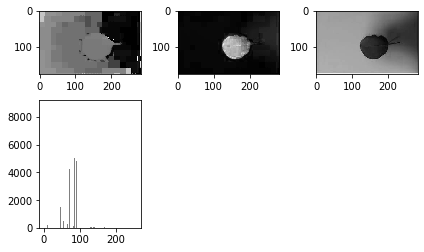

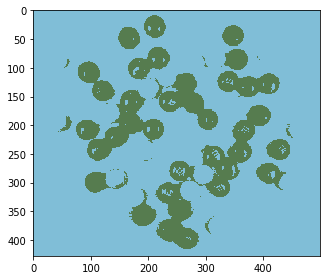

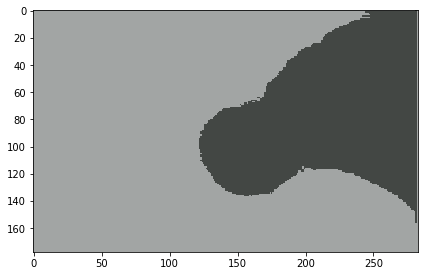

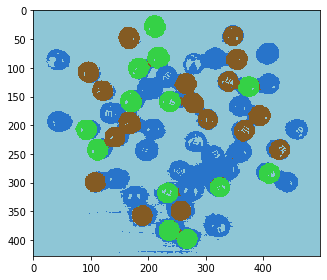

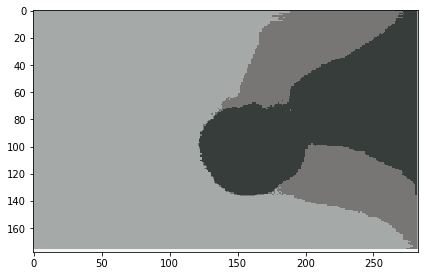

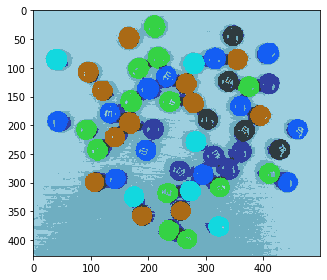

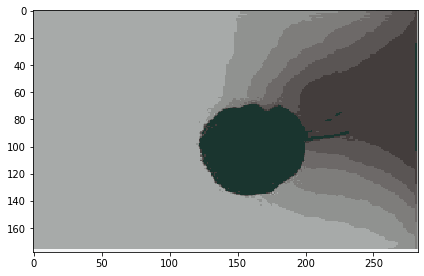

In [32]:
#The folder with tif jfif/jpg must be in 'Images\3' at root directory!
imgNamesJpg = glob.glob(r'Images\4\*.jpg') 
imgNamesJfif = glob.glob(r'Images\4\*.jfif') 
imgNames = imgNamesJpg + imgNamesJfif
for image in imgNames:
    img = cv2.imread(image)
    hist, bin = getImageHistorgam(img)
    hsv_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    ch1, ch2, ch3 = cv2.split(hsv_image)
    fig3 = plt.figure()
    fig3.add_subplot(231)
    plt.imshow(ch1)
    plt.tight_layout() 
    fig3.add_subplot(232)
    plt.imshow(ch2)
    plt.tight_layout()   
    fig3.add_subplot(233)
    plt.imshow(ch3)
    plt.tight_layout()
    fig3.add_subplot(234)
    plt.hist(ch1.flatten(),256,[0,256], color = 'grey')
    plt.tight_layout() 
    plt.show()
    
    
for i in [2,4,8]:
    for image in imgNames:
        img = cv2.imread(image)
        vectorized = img.reshape((-1,3))
        vectorized = np.float32(vectorized)
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
        K = i
        attempts=10
        ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)
        center = np.uint8(center)
        res = center[label.flatten()]
        result_image = res.reshape((img.shape))
        fig4 = plt.figure()
        fig4.add_subplot(111)
        plt.imshow(result_image)
        plt.tight_layout() 
        plt.show()

As a number of center increase we see more gradiend.

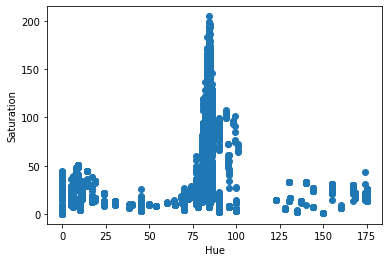

In [41]:
fig5 = plt.figure()
plt.ylabel('Saturation')
plt.xlabel('Hue')
plt.scatter(ch1[:,:],ch2[:,:])

Sometimes the part that less relevant but mostly presist in one of the layers then we would like to ignore that layer.